In [2]:
!python --version


Python 3.7.6


In [3]:
import sys
sys.path.insert(0, '/u/ageorge/athena_fork_turb_box/athena_new_version/athena/vis/python')
import athena_read
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import scipy.stats as stats
#import cmasher as cmr

# Access rainforest colormap through CMasher or MPL
#cmap = cmr.rainforest                   # CMasher


## Plotting current v_turb vs time

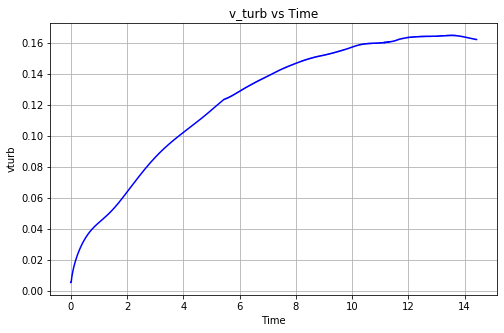

In [5]:
data = np.loadtxt("Turb_v2_init/Test_3/Turb.hst", comments="#")
time = data[:, 0]
mass = data[:, 2]

KE = data[:, 6] + data[:, 7] + data[:, 8]
vturb = np.sqrt(2 * KE / mass)


plt.figure(figsize=(8, 5))
plt.plot(time, vturb, color="blue")
plt.xlabel("Time")
plt.ylabel("vturb")
plt.title("v_turb vs Time")

plt.grid()
plt.savefig("vturb vs Time.png")
plt.show()



In [21]:
data = athena_read.athdf("Turb_v2_init/Test_3/Turb.out2.00057.athdf")
data

{'Coordinates': b'cartesian',
 'DatasetNames': array([b'prim'], dtype='|S21'),
 'MaxLevel': 0,
 'MeshBlockSize': array([32, 32, 64], dtype=int32),
 'NumCycles': 4937,
 'NumMeshBlocks': 32,
 'NumVariables': array([5], dtype=int32),
 'RootGridSize': array([128, 128, 128], dtype=int32),
 'RootGridX1': array([-0.5,  0.5,  1. ]),
 'RootGridX2': array([-0.5,  0.5,  1. ]),
 'RootGridX3': array([-0.5,  0.5,  1. ]),
 'Time': 23.943844175172046,
 'VariableNames': array([b'rho', b'press', b'vel1', b'vel2', b'vel3'], dtype='|S21'),
 'x1f': array([-0.5      , -0.4921875, -0.484375 , -0.4765625, -0.46875  ,
        -0.4609375, -0.453125 , -0.4453125, -0.4375   , -0.4296875,
        -0.421875 , -0.4140625, -0.40625  , -0.3984375, -0.390625 ,
        -0.3828125, -0.375    , -0.3671875, -0.359375 , -0.3515625,
        -0.34375  , -0.3359375, -0.328125 , -0.3203125, -0.3125   ,
        -0.3046875, -0.296875 , -0.2890625, -0.28125  , -0.2734375,
        -0.265625 , -0.2578125, -0.25     , -0.2421875, -0.

## Plotting Mach number vs time

In [18]:
file_names = sorted(glob.glob("Turb_v2_init/Test_3/*.athdf"))
gamma = 1.666666666667
vturbs = []
cs = []


for file in tqdm(file_names):
    if "out2" in file:
        data = athena_read.athdf(file)
        pressure = np.mean(data["press"])
        rho = np.mean(data["rho"])
        cs.append(np.sqrt(gamma * pressure / rho))

        velx = data['vel1']
        vely = data['vel2']
        velz = data['vel3']
        velx_mean = np.mean(velx)
        vely_mean = np.mean(vely)
        velz_mean = np.mean(velz)

        velx_prime = velx - velx_mean
        vely_prime = vely - vely_mean
        velz_prime = velz - velz_mean

        vturb = np.sqrt(np.mean(velx_prime**2 + vely_prime**2 + velz_prime**2 ))
        vturbs.append(vturb)
    else:
        pass
    



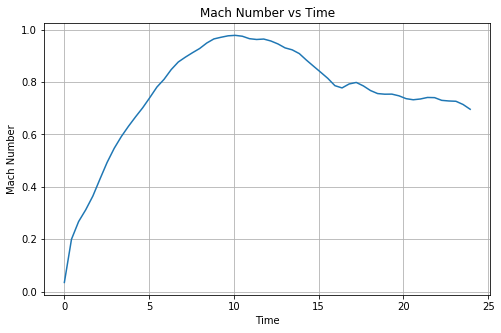

In [23]:
vturbs = np.array(vturbs)
cs = np.array(cs)

Mach_number = vturbs/cs
times = np.linspace(0, 23.94, 58)

plt.figure(figsize=(8, 5))
plt.plot(times, Mach_number)
plt.xlabel("Time")
plt.ylabel("Mach Number")
plt.title("Mach Number vs Time")

plt.grid()
plt.savefig("Mach number vs Time.png")
plt.show()


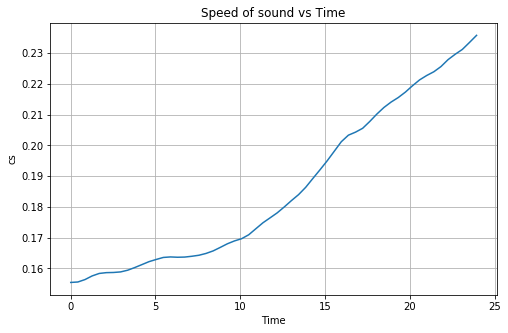

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(times, cs)
plt.xlabel("Time")
plt.ylabel("cs")
plt.title("Speed of sound vs Time")

plt.grid()
plt.savefig("cs vs Time.png")
plt.show()


## Plotting Temperature vs time

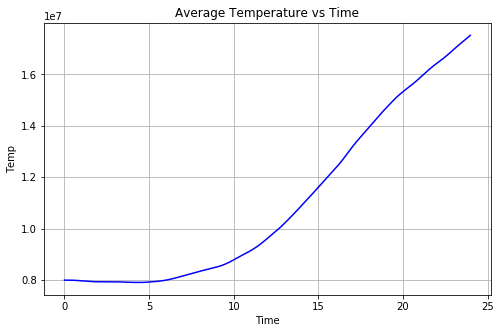

In [25]:
data = np.loadtxt("Turb_v2_init/Test_3/Turb.hst", comments="#")
time = data[:, 0]
temp = data[:,16]/64**3

plt.figure(figsize=(8, 5))
plt.plot(time, temp, color="blue")
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title("Average Temperature vs Time")

plt.grid()
plt.savefig("Temp vs Time.png")
plt.show()


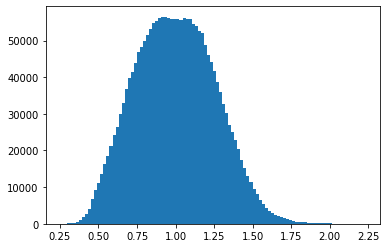

In [41]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_1/Turb.out2.00049.athdf')
#data['rho'].shape
#plt.imshow(data['press'][:,:,0])
plt.hist(data['rho'].flatten(), bins = 100)
plt.show()

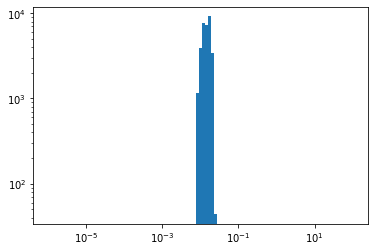

In [30]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_0/Turb.out2.00010.athdf')
#data['rho'].shape
press = data['press']
#plt.imshow(data['press'][:,:,0])
plt.hist(press.flatten(), bins = np.logspace(-5,2, 100))
plt.xscale('log')
plt.yscale('log')

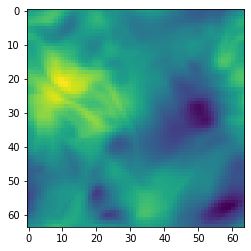

In [28]:
file_names = sorted(glob.glob("Turb_v2_init/Test_3/*.athdf"))

fig, ax = plt.subplots()
images = []

for file in tqdm(file_names[:]):
    if "out2" in file:
        rho = athena_read.athdf(file)["rho"]
        image = ax.imshow(rho[:,0,:], cmap="viridis", animated=True)
        images.append([image])
    else:
        pass

ani = animation.ArtistAnimation(fig = fig, artists = images, interval = 150, blit = True )

ani.save('Test_3.mp4')

['Turb_v2_init/Test_0/Turb.out2.00000.athdf',
 'Turb_v2_init/Test_0/Turb.out2.00001.athdf',
 'Turb_v2_init/Test_0/Turb.out2.00002.athdf',
 'Turb_v2_init/Test_0/Turb.out2.00003.athdf',
 'Turb_v2_init/Test_0/Turb.out2.00004.athdf',
 'Turb_v2_init/Test_0/Turb.out2.00005.athdf']